In [131]:
import pandas as pd
import numpy as np
import urllib.request as urllib2
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore 'Future warnings'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
#read the portfolio holding csv file
a = pd.read_csv("Holding_Rank_1.csv")

a.columns

Index(['Unnamed: 0', 'Asset_Name', 'Asset_Type', 'Sector', 'Funds_Name',
       'Rating', 'Fund Class', 'Value', 'Percentage'],
      dtype='object')

In [62]:
holding_df = a[['Asset_Name', 'Asset_Type', 'Sector', 'Funds_Name',
       'Rating', 'Fund Class', 'Value', 'Percentage']]
holding_df

,Asset_Name,Asset_Type,Sector,Funds_Name,Rating,Fund Class,Value,Percentage
0,Sonata,Equity,Information Technology,HDFC Small Cap Fund (G),NaN,NaN,98.38,3.68
1,Redington,Equity,Information Technology,HDFC Small Cap Fund (G),NaN,NaN,72.03,2.70
2,Aarti Ind,Equity,Chemicals,HDFC Small Cap Fund (G),NaN,NaN,69.93,2.62
3,KEC Intl,Equity,Engineering & Capital Goods,HDFC Small Cap Fund (G),NaN,NaN,64.93,2.43
4,LG Balakrishnan,Equity,Engineering & Capital Goods,HDFC Small Cap Fund (G),NaN,NaN,56.94,2.13
5,Dilip Buildcon,Equity,Cement & Construction,HDFC Small Cap Fund (G),NaN,NaN,56.75,2.13
6,Apar Ind,Equity,Miscellaneous,HDFC Small Cap Fund (G),NaN,NaN,56.29,2.11
7,TV TodayNetwork,Equity,Media & Entertainment,HDFC Small Cap Fund (G),NaN,NaN,56.37,2.11
8,Power Mech,Equity,Engineering & Capital Goods,HDFC Small Cap Fund (G),NaN,NaN,56.41,2.11
9,Tata Metaliks,Equity,Metals & Mining,HDFC Small Cap Fund (G),NaN,NaN,54.78,2.05


In [67]:
print(holding_df["Asset_Type"].unique())
print(holding_df["Asset_Type"].nunique())


['Equity' 'Others / Unlisted' 'Cash / Call' 'Mutual Funds' 'Money Market']
5


In [68]:
print(holding_df["Asset_Name"].unique())
print(holding_df["Asset_Name"].nunique())


['Sonata' 'Redington' 'Aarti Ind' 'KEC Intl' 'LG Balakrishnan'
 'Dilip Buildcon' 'Apar Ind' 'TV TodayNetwork' 'Power Mech' 'Tata Metaliks'
 'Oriental Carbon' 'SKF India' 'Balkrishna Ind' 'Atul Auto' 'TI Financial'
 'Carborundum' 'Nilkamal' 'Greenlam Ind' 'City Union Bank' 'IFB Industries'
 'NIIT Tech' 'VIP Industries' 'Vardhman Text' 'Kalpataru Power' 'Atul'
 'Goodyear' 'Hexaware Tech' 'Merck' 'Sundram' 'Sadbhav Engg' 'Shaily Engg'
 'PNC Infratech' 'Allahabad Bank' 'Indian Hotels' 'Swaraj Engines'
 'KEI Industries' 'Greenply Ind' 'Unichem Labs' 'Federal Bank'
 'Chambal Fert' 'VST Tillers' 'Indian Bank' 'GE Shipping' 'CenturyPlyboard'
 'JagranPrakashan' 'Everest Ind' 'Godrej Agrovet' 'Vesuvius India'
 'Sarla Performan' 'Titagarh Wagons' 'Insecticides' 'Aurobindo Pharm'
 'Time Techno' 'Dixon Technolog' 'DB Corp' 'Banco Products'
 'Amber Enterpris' 'Oriental Bank' 'Mahindra Logist' 'Hind Constr'
 'GNA Axles' 'Mold-Tek Pack' 'NRB Bearings' 'Garware Wall' 'Corporation Bk'
 'Avanti Feeds' 'I

In [69]:
print(holding_df["Sector"].unique())
print(holding_df["Sector"].nunique())

['Information Technology' 'Chemicals' 'Engineering & Capital Goods'
 'Cement & Construction' 'Miscellaneous' 'Media & Entertainment'
 'Metals & Mining' 'Automotive' 'Manufacturing'
 'Banking & Financial Services' 'Consumer Durables' 'Pharmaceuticals'
 'Services' 'Retail & Real Estate' 'Conglomerates' nan 'Oil & Gas'
 'Tobacco' 'Food & Beverages' 'Telecommunication' 'Consumer Non-durables'
 'Utilities']
21


In [70]:
print(holding_df["Funds_Name"].unique())
print(holding_df["Funds_Name"].nunique())

['HDFC Small Cap Fund  (G)' 'HDFC Small Cap Fund - Direct Plan (G)'
 'Invesco India Contra Fund - Direct Plan (G)'
 'Principal Emerging Bluechip Fund (G)'
 'Principal Emerging Bluechip Fund - Direct Plan (G)'
 'Principal Growth Fund (G)' 'Principal Growth Fund - Direct Plan (G)'
 'Sundaram Rural India Fund (G)'
 'Sundaram Rural India Fund - Direct Plan (G)'
 'Tata Equity P/E Fund - Regular Plan (G)']
10


In [118]:

fund_name_and_asset_type=pd.DataFrame({'count' : holding_df.groupby( [ 'Funds_Name','Asset_Type'] ).size()}).reset_index()
fund_name_and_asset_type


,Funds_Name,Asset_Type,count
0,HDFC Small Cap Fund (G),Cash / Call,2
1,HDFC Small Cap Fund (G),Equity,68
2,HDFC Small Cap Fund (G),Others / Unlisted,1
3,HDFC Small Cap Fund - Direct Plan (G),Cash / Call,2
4,HDFC Small Cap Fund - Direct Plan (G),Equity,68
5,HDFC Small Cap Fund - Direct Plan (G),Others / Unlisted,1
6,Invesco India Contra Fund - Direct Plan (G),Cash / Call,1
7,Invesco India Contra Fund - Direct Plan (G),Equity,43
8,Principal Emerging Bluechip Fund (G),Cash / Call,1
9,Principal Emerging Bluechip Fund (G),Equity,87


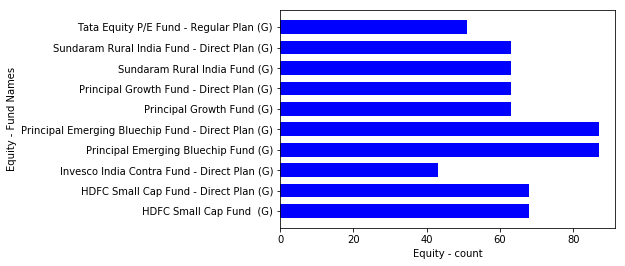

In [155]:
equity = fund_name_and_asset_type[fund_name_and_asset_type['Asset_Type'] == "Equity"].reset_index(drop=True)
equity

y = equity["count"]
N = len(equity["count"])
x = equity["Funds_Name"]
width = 1/1.5
plt.xlabel("Equity - count")
plt.ylabel("Equity - Fund Names")
plt.barh(x, y, width, color="blue")


fig = plt.gcf()

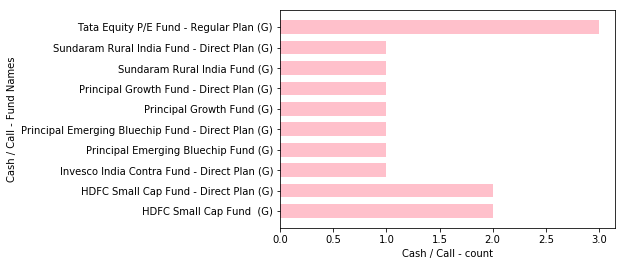

In [164]:
cash_call = fund_name_and_asset_type[fund_name_and_asset_type['Asset_Type'] == "Cash / Call"].reset_index(drop=True)
cash_call


y = cash_call["count"]
N = len(cash_call["count"])
x = cash_call["Funds_Name"]
width = 1/1.5
plt.xlabel("Cash / Call - count")
plt.ylabel("Cash / Call - Fund Names")
plt.barh(x, y, width, color="pink")


fig = plt.gcf()

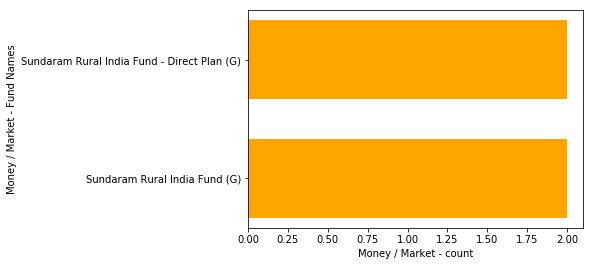

In [162]:
money_market = fund_name_and_asset_type[fund_name_and_asset_type['Asset_Type'] == "Money Market"].reset_index(drop=True)
money_market

y = money_market["count"]
N = len(money_market["count"])
x = money_market["Funds_Name"]
width = 1/1.5
plt.xlabel("Money / Market - count")
plt.ylabel("Money / Market - Fund Names")
plt.barh(x, y, width, color="orange")


fig = plt.gcf()

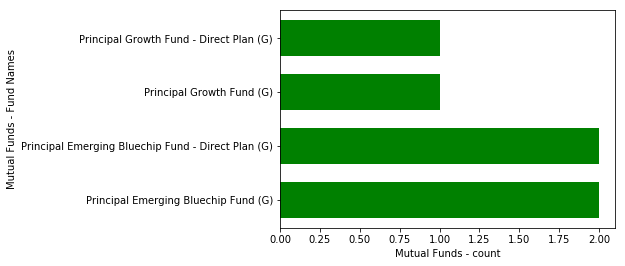

In [161]:
mutual_funds = fund_name_and_asset_type[fund_name_and_asset_type['Asset_Type'] == "Mutual Funds"].reset_index(drop=True)
mutual_funds

y = mutual_funds["count"]
N = len(mutual_funds["count"])
x = mutual_funds["Funds_Name"]
width = 1/1.5
plt.xlabel("Mutual Funds - count")
plt.ylabel("Mutual Funds - Fund Names")
plt.barh(x, y, width, color="green")


fig = plt.gcf()

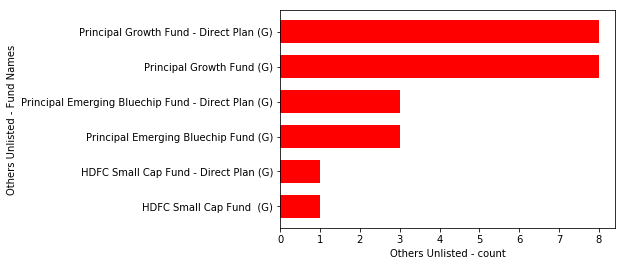

In [160]:
others_unlisted = fund_name_and_asset_type[fund_name_and_asset_type['Asset_Type'] == "Others / Unlisted"].reset_index(drop=True)
others_unlisted

y = others_unlisted["count"]
N = len(others_unlisted["count"])
x = others_unlisted["Funds_Name"]
width = 1/1.5
plt.xlabel("Others Unlisted - count")
plt.ylabel("Others Unlisted - Fund Names")
plt.barh(x, y, width, color="red")


fig = plt.gcf()

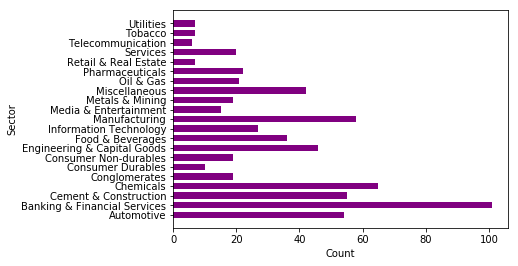

In [171]:
fund_name_and_sector=pd.DataFrame({'count' : holding_df.groupby( 'Sector' ).size()}).reset_index()
fund_name_and_sector

y = fund_name_and_sector["count"]
N = len(fund_name_and_sector["count"])
x = fund_name_and_sector["Sector"]
width = 1/1.5
plt.xlabel("Count")
plt.ylabel("Sector")
plt.barh(x, y, width, color="purple")


fig = plt.gcf()

In [183]:
# holding_df['Value'].sum()
holding_df[['Value','Percentage']] = holding_df[['Value','Percentage']].apply(pd.to_numeric)
holding_df['Value'].sum()

ValueError: ('Unable to parse string "-" at position 142', 'occurred at index Value')